In [ ]:
!pip install geopandas

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 

In [ ]:
bd = pd.read_html('https://www.citypopulation.de/en/bangladesh/admin/')

In [ ]:
bd = bd[0]

In [ ]:
population_data = pd.DataFrame(bd)

In [ ]:
population_data.head()

,Name,Status,Transcription,Native,PopulationCensus1991-03-13,PopulationCensus2001-01-22,PopulationCensus2011-03-15,Unnamed: 7
0,Bagerhat,District,Bāgērahāṭa,বাগেরহাট জেলা,1431332,1549031,1476090,→
1,Bagerhat Sadar,Subdistrict,Bāgērahāṭa Sadara,বাগেরহাট সদর উপজেলা,235848,257273,266389,→
2,Chitalmari,Subdistrict,Citalamārī,চিতলমারী উপজেলা,127524,139862,138810,→
3,Fakirhat,Subdistrict,Phakirahāṭa,ফকিরহাট উপজেলা,123956,134418,137789,→
4,Kachua,Subdistrict,Kacuẏā,কচুয়া উপজেলা,93249,100093,97011,→


In [ ]:
population_data = population_data.loc[:, ~population_data.columns.str.contains('^Unnamed')]
population_data.head()

,Name,Status,Transcription,Native,PopulationCensus1991-03-13,PopulationCensus2001-01-22,PopulationCensus2011-03-15
0,Bagerhat,District,Bāgērahāṭa,বাগেরহাট জেলা,1431332,1549031,1476090
1,Bagerhat Sadar,Subdistrict,Bāgērahāṭa Sadara,বাগেরহাট সদর উপজেলা,235848,257273,266389
2,Chitalmari,Subdistrict,Citalamārī,চিতলমারী উপজেলা,127524,139862,138810
3,Fakirhat,Subdistrict,Phakirahāṭa,ফকিরহাট উপজেলা,123956,134418,137789
4,Kachua,Subdistrict,Kacuẏā,কচুয়া উপজেলা,93249,100093,97011


In [ ]:
population_data = population_data[['Name','Status','PopulationCensus2011-03-15']]

In [ ]:
population_data.rename(columns = {'PopulationCensus2011-03-15': 'Population'}, inplace = True)

In [ ]:
population_data.head()

,Name,Status,Population
0,Bagerhat,District,1476090
1,Bagerhat Sadar,Subdistrict,266389
2,Chitalmari,Subdistrict,138810
3,Fakirhat,Subdistrict,137789
4,Kachua,Subdistrict,97011


In [ ]:
population_data.isnull().sum()

Name          0
Status        0
Population    0
dtype: int64

In [ ]:
population_data.Status.unique()

array(['District', 'Subdistrict', 'City District', "People's Republic"],
      dtype=object)

In [ ]:
population_data_dist = population_data.loc[population_data['Status'] == 'District']

In [ ]:
population_data_dist.head()

,Name,Status,Population
0,Bagerhat,District,1476090
10,Bandarban,District,388335
18,Barguna,District,892781
25,Barisal,District,2324310
36,Bhola,District,1776795


In [ ]:
population_data_dist.to_excel(r'/content/p.xlsx')

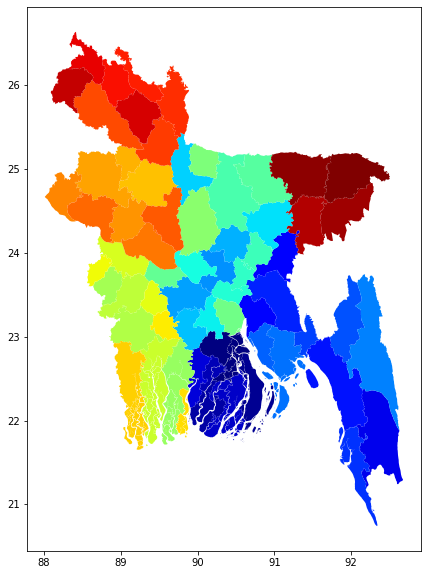

In [ ]:
bd_districts = gpd.read_file('/content/BGD_adm2.shp')
bd_districts.plot(cmap = 'jet', figsize = (10,10))

In [ ]:
bd_districts = bd_districts[['NAME_2', 'geometry']]
bd_districts.rename(columns = {'NAME_2' : 'District'}, inplace = True)

In [ ]:
bd_districts.head()

,District,geometry
0,Barisal,"MULTIPOLYGON (((90.43000 22.50139, 90.43000 22..."
1,Bhola,"MULTIPOLYGON (((90.59583 21.73779, 90.59525 21..."
2,Borgona,"MULTIPOLYGON (((90.10386 21.87963, 90.10385 21..."
3,Jhalakati,"MULTIPOLYGON (((90.29806 22.66250, 90.29833 22..."
4,Patuakhali,"MULTIPOLYGON (((90.46986 21.77990, 90.46980 21..."


In [ ]:
bd_districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
bd_districts.to_crs(epsg=9678, inplace = True)

Yeah I had to do them manually. Sad me :""""""")

In [ ]:
population_data_dist.replace('Barguna', 'Borgona', inplace = True)
population_data_dist.replace('Jhalakati [Jhalokati]', 'Jhalakati', inplace = True)
population_data_dist.replace('Bandarban', 'Bandarbon', inplace = True)
population_data_dist.replace('Khagrachhari', 'Khagrachari', inplace = True)
population_data_dist.replace('Barguna', 'Parbattya Chattagram', inplace = True)
population_data_dist.replace('Gopalganj', 'Gopalgonj', inplace = True)
population_data_dist.replace('Manikganj', 'Manikgonj', inplace = True)
population_data_dist.replace('Munshiganj', 'Munshigonj', inplace = True)
population_data_dist.replace('Narayanganj', 'Naray Angonj', inplace = True)
population_data_dist.replace('Narsingdi', 'Narshingdi', inplace = True)
population_data_dist.replace('Netrakona [Netrokona]', 'Netrakona', inplace = True)
population_data_dist.replace('Chuadanga', 'Choua Danga', inplace = True)
population_data_dist.replace('Kushtia', 'Kustia', inplace = True)
population_data_dist.replace('Satkhira', 'Shatkhira', inplace = True)
population_data_dist.replace('Jaipurhat [Joypurhat]', 'Jaipurhat', inplace = True)
population_data_dist.replace('Chapai Nawabganj', 'Nawabganj', inplace = True)
population_data_dist.replace('Sirajganj', 'Sirajgonj', inplace = True)
population_data_dist.replace('Gaibandha', 'Gaibanda', inplace = True)
population_data_dist.replace('Rangpur', 'Rongpur', inplace = True)
population_data_dist.replace('Habiganj', 'Hobiganj', inplace = True)
population_data_dist.replace('Maulvi Bazar [Moulvibazar]', 'Moulvibazar', inplace = True)
population_data_dist.replace('Sunamganj', 'Sun Amgonj', inplace = True)

Still missing 2 districts 

In [ ]:
for index, row in bd_districts['District'].iteritems():
    if row in population_data_dist['Name'].tolist():
        pass
    else:
        print( row ,' is NOT in the list')

Parbattya Chattagram  is NOT in the list
Nasirabad  is NOT in the list


In [ ]:
population_data_dist.rename(columns = {'Name' : 'District'}, inplace = True)

In [ ]:
bd_districts['area'] = bd_districts.area/1000000

In [ ]:
bd_districts.head()

,District,geometry,area
0,Barisal,"MULTIPOLYGON (((544510.814 488094.952, 544511....",2233.020721
1,Bhola,"MULTIPOLYGON (((561898.679 403630.038, 561838....",1780.339084
2,Borgona,"MULTIPOLYGON (((511012.957 419214.206, 511012....",1352.470541
3,Jhalakati,"MULTIPOLYGON (((530904.258 505896.074, 530932....",704.991208
4,Patuakhali,"MULTIPOLYGON (((548857.033 408245.930, 548850....",2399.169752


In [ ]:
bd_districts.shape

(65, 3)

In [ ]:
bd_districts = bd_districts.merge(population_data_dist, on = 'District')

In [ ]:
bd_districts['pop_den (people/sq. km)'] = bd_districts['Population']/bd_districts['area']

In [ ]:
bd_districts.shape

(63, 6)

As we can see there are 2 region missing in the map. Because the Geo data I collected has 65 districts and the population data has 64. Between them Parbattya Chattagram Nasirabad can not be found so there has been a gap in the map. I will try to find a solution in future.

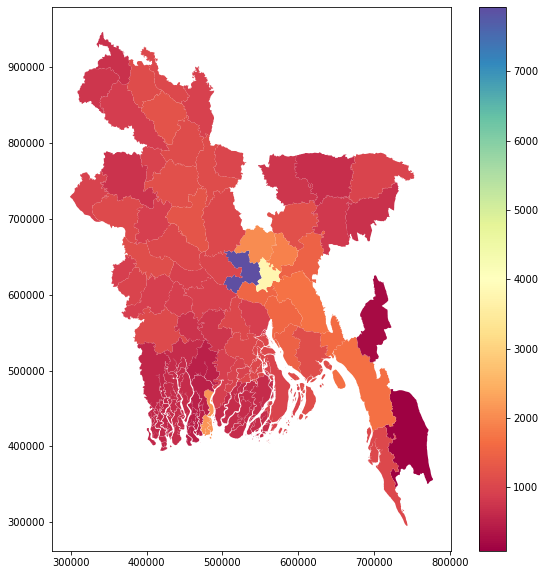

In [ ]:
bd_districts.plot(column = 'pop_den (people/sq. km)', cmap = 'Spectral',figsize =(10,10), legend = True)